counter =  13
 12 hours
file  data/urban_plume_0001_00000013.nc


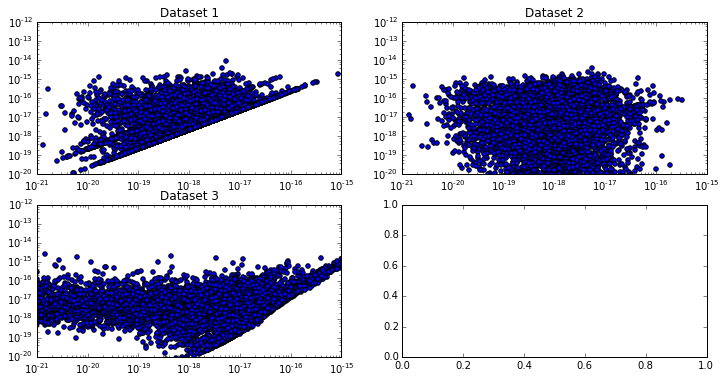

In [1]:
%matplotlib inline
import scipy.io
import sys
import numpy as np
import matplotlib
import os

import matplotlib.pyplot as plt
sys.path.append("../../tool")
import partmc3 as partmc

from IPython.html.widgets import interact, interactive, fixed
from IPython.html import widgets
from IPython.html.widgets.interaction import interact_manual

def make_plot(in_dir, in_filename, title):
    print ('file ', in_dir+in_filename)
    
    ncf = scipy.io.netcdf.netcdf_file(in_dir+in_filename, 'r', mmap=False)
    particles= partmc.aero_particle_array_t(ncf)
    ncf.close()
    
    bc =  particles.masses(include = ["BC"])/particles.aero_data.molec_weights[0]
    oc =  particles.masses(include = ["OC"])/particles.aero_data.molec_weights[3] 
    no3 =  particles.masses(include = ["NO3"])/particles.aero_data.molec_weights[1]  

    
    #fig, (ax1,ax2,ax3,ax4) = plt.subplots(2,2,figsize=(12,6))
    fig = plt.subplots(2,2,figsize=(12,6))
    ax1 = plt.subplot(2,2,1)
    ax2 = plt.subplot(2,2,2)
    ax3 = plt.subplot(2,2,3)
    ax4 = plt.subplot(2,2,4)
    #fig.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95, hspace=0.1, wspace=0.1)
    
    ax1.scatter(bc, oc)
    ax1.set_xscale("log") # x axis log
    ax1.set_yscale("log") # y axis log
    ax1.set_xlim([1e-21, 1e-15])
    ax1.set_ylim([1e-20, 1e-12])
    ax1.set_title("Dataset 1")
    
    ax2.scatter(bc, no3)
    ax2.set_xscale("log") # x axis log
    ax2.set_yscale("log") # y axis log
    ax2.set_xlim([1e-21, 1e-15])
    ax2.set_ylim([1e-20, 1e-12])
    ax2.set_title("Dataset 2")
    
    ax3.scatter(no3, oc)
    ax3.set_xscale("log") # x axis log
    ax3.set_yscale("log") # y axis log
    ax3.set_xlim([1e-21, 1e-15])
    ax3.set_ylim([1e-20, 1e-12])
    ax3.set_title("Dataset 3")
    
    plt.show()

def setup_plot(counter):
    print ("counter = ", counter)
    
    in_dir = "data/"
    #in_filename = "urban_plume_4m_0001_000000%02d.nc" % counter
    in_filename = "urban_plume_0001_000000%02d.nc" % counter
    title = " %02d hours" % (counter-1)
    #out_filename = "figs/scatter_mass_%02d.pdf" % counter

    print(title)

    #make_plot(in_dir, in_filename, title, out_filename)
    make_plot(in_dir, in_filename, title)
    
interact_manual(setup_plot, counter=widgets.IntSlider(min=1,max=25,value=19))